## LEAKY INTEGRATE AND FIRE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import random

In [ ]:
dt = 0.05
max_t = 10
init_t = 0.0
start_time = 1.0
stop_time = 6.0
cap = 1
res = 2
threshold = 3.0
spike_display = 8.0
init_v = 0.0
voltage = init_v
tau = res * cap
eL = 0
gL = tau

In [ ]:
def update(old_value, roc, time_step):
    return ((roc * time_step) + old_value)

def dv_dt(localres, locali, localv):
    return locali - localv/localres

def voltage_choise(curr_volt, spike_status, thr, sd):
    if (curr_volt > thr) and (not spike_status):
        spike_status = True
        return sd, spike_status
    elif (curr_volt > thr) and spike_status:
        spike_status = False
        return 0.0, spike_status
    elif (curr_volt < thr) and spike_status:
        spike_status = False
        return curr_volt, spike_status
    elif (curr_volt < thr) and (not spike_status):
        spike_status = False
        return curr_volt, spike_status

In [ ]:
def run_iandf_sim():
    random.seed(4)
    time = []
    V = []
    I=[]
    spike_status = False
    
    for idt in range(int(max_t/dt)):
        noise = round(random.uniform(1.33, 1.66), 2)
        time.append(dt*idt)
        if time[idt] <= start_time or time[idt] >= stop_time:
            I.append(0)
            if idt == 0:
                dv = dv_dt(res, I[idt], init_v)
                v_now = update(init_v, dv, dt)
            else:
                dv = dv_dt(res, I[idt], V[idt-1])
                v_now = update(V[idt-1], dv, dt)
            v_now, spike_status = voltage_choise(v_now, spike_status, threshold, spike_display)
            V.append(v_now)
        if time[idt] > start_time and time[idt] < stop_time:
            I.append(noise)
            dv = dv_dt(res, I[idt], V[idt-1])
            v_now = update(V[idt-1], dv, dt)
            v_now, spike_status = voltage_choise(v_now, spike_status, threshold, spike_display)
            V.append(v_now)
           

    return V, I, time

v, i, t = run_iandf_sim()

In [ ]:
v, i, t = run_iandf_sim()

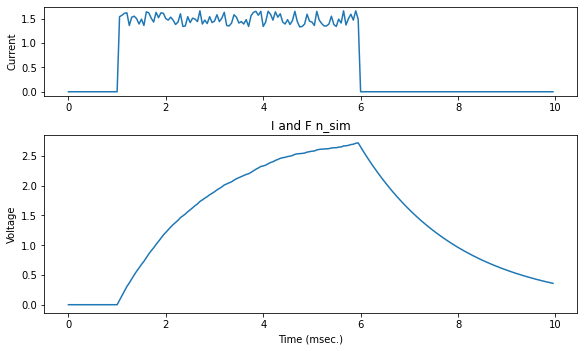

In [ ]:
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
spec = fig.add_gridspec(4, 4)
ax0 = fig.add_subplot(spec[0, :])
ax0.plot(t, i)
ax0.set_ylabel("Current")
ax10 = fig.add_subplot(spec[1:3, :], sharex = ax0)
ax10.set_title("I and F n_sim")
ax10.plot(t, v)
ax10.set_ylabel("Voltage")
ax10.set_xlabel("Time (msec.)")
plt.savefig("tex/Images/LIF_plot.png")

